# Exploratory Data Analysis

First step is to import the necessary libraries then load my cleaned dataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### load the cleaned dataset

the datatypes established in the investiation jupyter notebook do not save when the cleaned csv is saved. I have provided them here in a dictionary so that they can be changed again when loaded here. 

In [20]:
dtypes_dict = {'age':'Int8', 
               'sex':'category', 
               'smoker':'category',
               'children': 'category',
               'region':'category', 
               'region (N/S)':'category', 
               'region (E/W)':'category', 
               'bmi category': 'category'}

df = pd.read_csv('../data/insurance_cleaned.csv', dtype=dtypes_dict)
df

,age,sex,bmi,children,smoker,region,charges,region (N/S),region (E/W),bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,south,west,overweight
1,18,male,33.770,1,no,southeast,1725.55230,south,east,obese
2,28,male,33.000,3,no,southeast,4449.46200,south,east,obese
3,33,male,22.705,0,no,northwest,21984.47061,north,west,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,north,west,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,north,west,obese
1334,18,female,31.920,0,no,northeast,2205.98080,north,east,obese
1335,18,female,36.850,0,no,southeast,1629.83350,south,east,obese
1336,21,female,25.800,0,no,southwest,2007.94500,south,west,overweight


I know that there are no null values in this dataset, but I can check that the data in each column make sense. For the categorical values I can check what the unique values are to see if there is anything that shouldn't be there. In the numerical columns I can use boxplots to check for outliers.

I checked the children column in my data investigation and each row had from 0 to 5 children, which makes sense. 

In [21]:
df['sex'].unique()
#only two unique
# values in sex column, female and male

['female', 'male']
Categories (2, object): ['female', 'male']

In [22]:
df['smoker'].unique()
#only two unique values in smoker column, yes and no

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [23]:
df['region'].unique()
# only four unique values in region column, all of which make sense

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

### Boxplots for numerical values

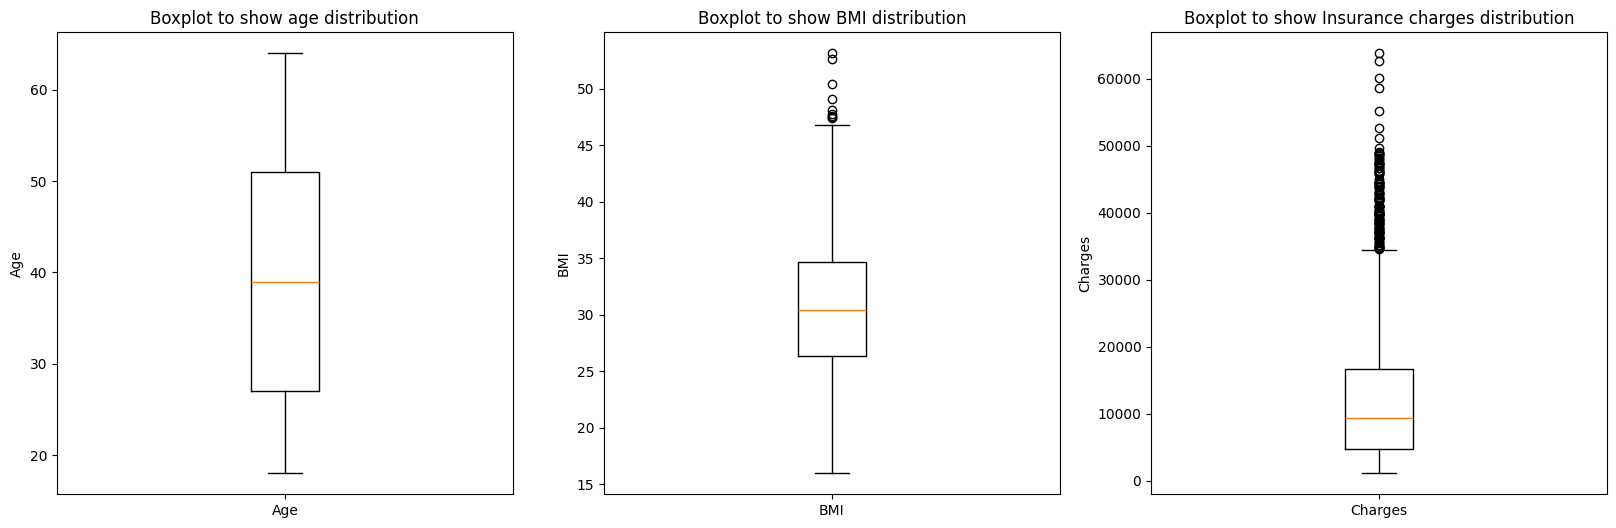

In [24]:
#using matplot lib to make 3 boxplots, one for age, one for bmi and one for charges

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

ax[0].boxplot(df['age'], labels=['Age'])
ax[1].boxplot(df['bmi'], labels=['BMI'])
ax[2].boxplot(df['charges'], labels=['Charges'])

ax[0].set_ylabel('Age')
ax[1].set_ylabel('BMI')
ax[2].set_ylabel('Charges')

ax[0].set_title('Boxplot to show age distribution')
ax[1].set_title('Boxplot to show BMI distribution')
ax[2].set_title('Boxplot to show Insurance charges distribution')

plt.tight_layout
plt.show()

There are no outliers in the age column, meaning that no unrealistic ages have been input into the data.
The large amout of outliers in both BMI and charges represent real world examples of people who are either overweight or being charged a large amount for their insurance. Those are being charged lots for their insurance may because smoke or they may have a some medical needs which increases their insurance charges. For this reason the outliers are likely not to be mistakes but interesting values in the dataset. 

### Descriptive Statistics: Display average insurance charges by age, gender, and region.
#### Hypothesis 1: On average, men pay more in insurance charges than women.
I am going to group the results by age, gender and region to get the average results for each one, then plot the results in bar graphs

In [25]:
#data grouped by age then mean calculated, this gives me the mean average value charged for each age
df_group_age = df.groupby(by=['age'])['charges'].mean().round(2)
df_group_age.head()

age
18     7086.22
19     9747.91
20    10159.70
21     4730.46
22    10012.93
Name: charges, dtype: float64

In [ ]:
#data grouped by sex then the mean is calculated, giving me the mean average charged for each sex
df_group_sex = df.groupby(by=['sex'])['charges'].mean().round(2)
df_group_sex

C:\Users\tb975\AppData\Local\Temp\ipykernel_24132\246866037.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

In [27]:
#Grouped by region, giving me the mean average charged per each of the four regions
df_group_region = df.groupby(by=['region'])['charges'].mean().round(2)
df_group_region


C:\Users\tb975\AppData\Local\Temp\ipykernel_24132\965019730.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

I can plot bar charts to show the variation in these average insurance charges to show how they vary by the different characteristics in this dataset 

C:\Users\tb975\AppData\Local\Temp\ipykernel_24132\595163022.py:19: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



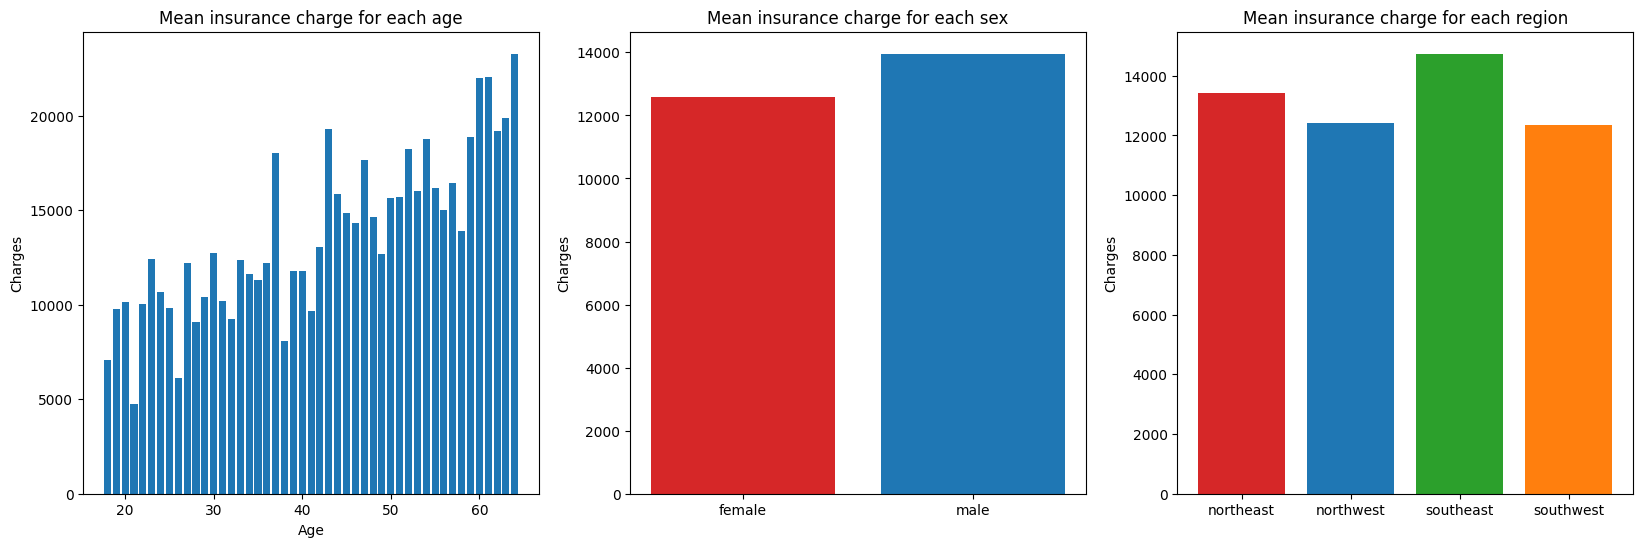

In [39]:
#I want to make a matplotlib figure with 3 plots, one for age, one for sex one for region
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax[0].bar(x=df_group_age.index, height=df_group_age, label='Age')
ax[1].bar(x=df_group_sex.index, height=df_group_sex, color=bar_colors, label='Sex')
ax[2].bar(x=df_group_region.index, height=df_group_region, color=bar_colors, label='region')

ax[0].set_title('Mean insurance charge for each age')
ax[1].set_title('Mean insurance charge for each sex')
ax[2].set_title('Mean insurance charge for each region')

ax[0].set_xlabel('Age')
for a in ax:
    a.set_ylabel('Charges')
    

fig.show()

From these charts you can see that there is a trend that as age increases that average insurance charges increases. 

You can also see that men on average pay more than women. This answers the question of my first hypothesis It would be interesting to investigate why. Do more men smoke or have a higher BMI?

You can also see that there is not a significant difference between average charges across regions, but southeast seem to pay slightly more than the other regions. 

### Correlation Analysis: Visualise correlations between different attributes and insurance charges.
#### Hypothesis 2: Being older increases your insurance charges more than being overweight.

<Axes: xlabel='children', ylabel='charges'>

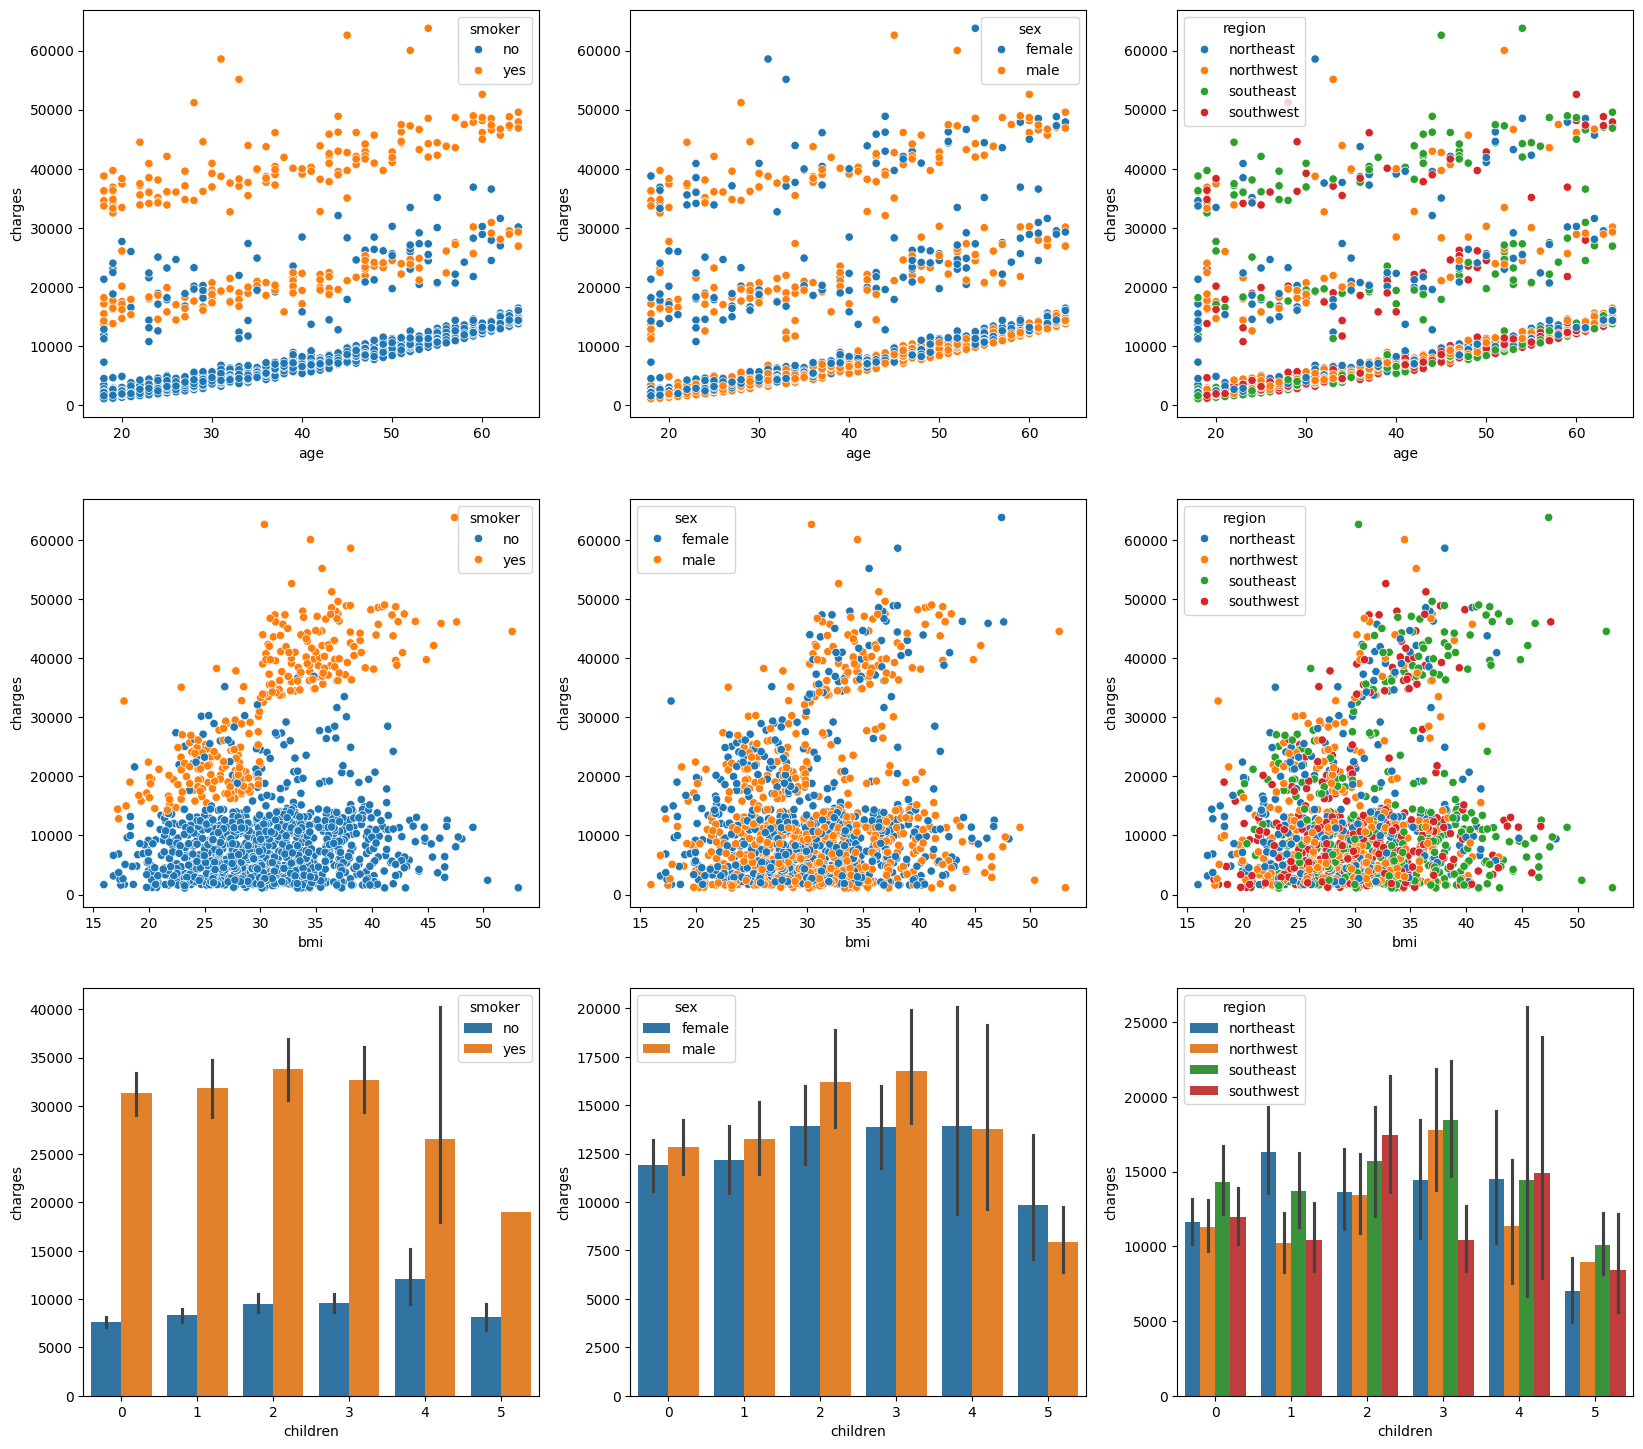

In [41]:
fig, ax = plt.subplots(3, 3, figsize=(20, 18))

sns.scatterplot(data=df, x='age', y='charges', hue='smoker', ax=ax[0,0])
sns.scatterplot(data=df, x='age', y='charges', hue='sex', ax=ax[0,1])
sns.scatterplot(data=df, x='age', y='charges', hue='region', ax=ax[0,2])

sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=ax[1,0])
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex', ax=ax[1,1])
sns.scatterplot(data=df, x='bmi', y='charges', hue='region', ax=ax[1,2])

sns.barplot(data=df, x='children', y='charges', hue='smoker', ax=ax[2,0])
sns.barplot(data=df, x='children', y='charges', hue='sex', ax=ax[2,1])
sns.barplot(data=df, x='children', y='charges', hue='region', ax=ax[2,2])

# Chart discussion

### Age
It is clear from each of these graphs that as age increases, insurance charges increase. You can also see that if you split the graph to show smokers and non-smokers that smokers generally pay more than non-smokers, with some exceptions. You can see 3 distinct groups in the data, the bottom section of all non-smokers with a tight range in charges, suggesting that as age increases insurance charge increases. Then a middle section with a mixture of smokers and non-smokers, then an upper band of all smokers. It would be interesting to see if the non-smokers who pay more have a higher BMI and if the smokers in the top band who pay more than the middle band smokers also have a higher BMI.
If I have time I will investigate this in plotly. 

From the charts which are coloured by sex and region it is hard to tell if different sex or region has a predictable effect on insurance charges. 

### BMI

There is a less clear general upward trend between BMI and charges. There is a large section of the graph where there seems to be no correlation, and in fact there are some people with large BMI who have low insurance charges. Colouring by smoker shows clearly that being a smoker increases your insurance charges. 

Nothing clear can be seen from colouring by sex and region.

### Children

There does not seem to be much correlation between how many childen you have and your insurance charges

# Correlation heatmap

In [ ]:
# investigate correlation between numerical values as well as smoker or non-smoker. 
# To include smoker in this we need to convert the smoker column (currently yes, no), into yes = 1 and no = 0 
df_copy = df.copy()
df_copy['smoker']= df_copy['smoker'].map({'yes':1, 'no':0}).astype(int)

#drop categorical variables
df_copy = df_copy.drop(columns=df_copy.select_dtypes(include='category'))

df_correlation = df_copy.corr(method='pearson')
df_correlation

,age,bmi,smoker,charges
age,1.000000,0.109272,-0.025019,0.299008
bmi,0.109272,1.000000,0.003750,0.198341
smoker,-0.025019,0.003750,1.000000,0.787251
charges,0.299008,0.198341,0.787251,1.000000


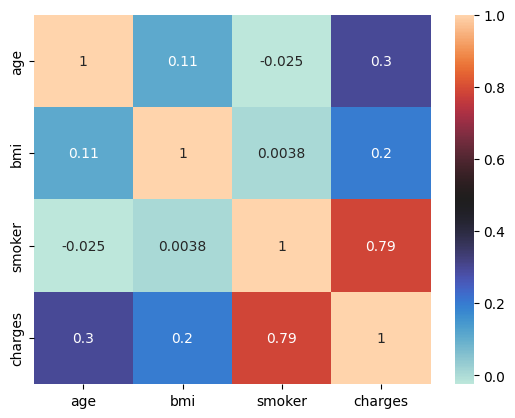

In [75]:
sns.heatmap(data=df_correlation, annot=True, cmap="icefire")
plt.show()

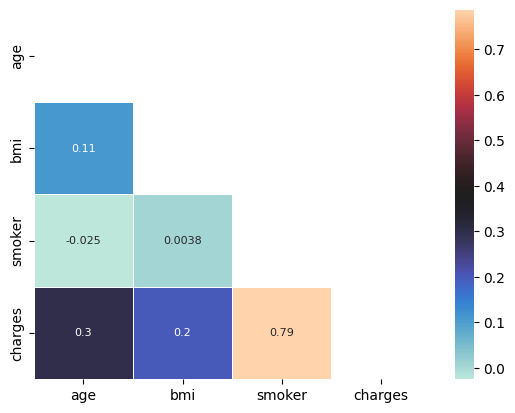

In [80]:
# code copied from LMS to remove duplicated side
mask = np.zeros_like(df_correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_correlation,annot=True,mask=mask,cmap='icefire',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_correlation.shape[1],0);
plt.show()

As you can see there is a much higher correlation between being a smoker and high insurance charges. There is also a higher correlaion between age and insurance charges than bmi and insurance charges. Though age and bmi have quite similar correlations with charge, we can draw the conclusion that being old is more likely to increase your insurance charge than being overweight. 

### Predictive Analysis: Develop and visualise predictive reports for estimating insurance costs.

We can use plotly to look more closely at some of the charts above. Below is a graph of age vs charge coloured for smoker, this could be used to predict, based on your age and smoker status how much your insurance charges may be. The limitations of this is that it does not consider your BMI. 

In [ ]:
fig = px.scatter(df, x='age', y='charges', color='smoker',
                 labels={
                     'age': 'Age (years)',
                     'charges':'Charges ($)',
                     'smoker': 'Smoker'
                 },
                 title='Isurance charges against Age, split into smoker and non-smoker by colour')

fig.update_xaxes(showgrid=True, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_xaxes(showline=True, linecolor='black', linewidth=1)
fig.update_yaxes(showline=True, linecolor='black', linewidth=1)

#y-axis is not currently at 0 so setting it to 0
fig.update_yaxes(range=[0, None]) # sets the range from 0 to none which allows plotly to figure out the upper bound
fig.show()

c:\Users\tb975\OneDrive\Documents\vs_code_projects\Assignment-1---Healthcare-analysis\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



I think that adding trendlines to this would make it easier to predict insurance charges based on attributes. I tried to do this in plotly but I couldn't get it to work. This may be easier in Seaborn. 

Below we have a chart which I hoped would help predict charges based on BMI but it is too hard to read with the 5 different categories. If I have time I will re-evaluate the categories and see if I can make the graph clearer. 

In [73]:
fig = px.scatter(df, x='age', y='charges', color='bmi category',
                 labels={
                     'age': 'Age (years)',
                     'charges':'Charges ($)',
                     'bmi category': 'BMI category'
                 },
                 title='Insurance charges against age, split into different categories of BMI')

fig.update_xaxes(showgrid=True, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_xaxes(showline=True, linecolor='black', linewidth=1)
fig.update_yaxes(showline=True, linecolor='black', linewidth=1)

#y-axis is not currently at 0 so setting it to 0
fig.update_yaxes(range=[0, None])

fig.show()

c:\Users\tb975\OneDrive\Documents\vs_code_projects\Assignment-1---Healthcare-analysis\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



It is possible to draw a graph that considers age, bmi and whether you are a smoker by using a 3d plot. It is slightly hard to read but in theory, if you had someone's age, bmi and smoker status you coulkd find the correct area on the graph and predict their insurance charges. 

In [71]:
fig = px.scatter_3d(df, x='age', y='bmi', z='charges', color='smoker',
                    color_discrete_map={'yes': "#E50606", 'no': '#5D69B1'})
fig.show()

c:\Users\tb975\OneDrive\Documents\vs_code_projects\Assignment-1---Healthcare-analysis\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Geographic Analysis: Visualise the impact of geographic regions on insurance charges.

#### Hypothesis 3: Insurance charges are greater in the East of the US than the West.

In [77]:

df_group_EW = df.groupby(by=['region (E/W)'])['charges'].mean().round(2)
df_group_EW

C:\Users\tb975\AppData\Local\Temp\ipykernel_24132\3905232124.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



region (E/W)
east    14109.53
west    12382.26
Name: charges, dtype: float64

Yes, on average the charges are greater in the East of the US than the West